<a href="https://colab.research.google.com/github/avisekksarma/ML-projects/blob/main/Fraud_detection/data_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Mounted at /content/gdrive


In [ ]:
# import zipfile
# zip_ref = zipfile.ZipFile("/content/gdrive/My Drive/Fraud_detection/ieee-fraud-detection.zip", 'r')
# zip_ref.extractall("/content/gdrive/My Drive/Fraud_detection/")
# zip_ref.close()

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  preprocessing
import gc

%matplotlib inline


In [ ]:
os.chdir('//content/gdrive/My Drive/Fraud_detection/')
# !ls

In [ ]:
train_identity = pd.read_csv("train_identity.csv")
train_transaction = pd.read_csv("train_transaction.csv")

test_identity = pd.read_csv("test_identity.csv")
test_transaction = pd.read_csv("test_transaction.csv")

In [ ]:
train_df = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test_df = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

print(train_df.shape)
print(test_df.shape)
test_df.columns = test_df.columns.str.replace('-','_')

(590540, 435)
(506691, 434)


In [ ]:
# train_df.head()

In [ ]:
print(train_df.shape)
print(test_df.shape)
print(train_df.shape[0] + test_df.shape[0])

(590540, 435)
(506691, 434)
1097231


In [ ]:
del train_identity, train_transaction , test_identity , test_transaction

In [ ]:
train_df.head(200)

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
#DOn't drop isFraud value here
# target = train_df['isFraud'].copy()
# train_df = train_df.drop('isFraud', axis=1)

In [ ]:
train_df.shape[0] + test_df.shape[0]

1097231

In [ ]:
# import datetime

# START_DATE = '2017-12-01'
# startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
# df_trans["Date"] = df_trans['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

# df_trans['_Weekdays'] = df_trans['Date'].dt.dayofweek
# df_trans['_Hours'] = df_trans['Date'].dt.hour
# df_trans['_Days'] = df_trans['Date'].dt.day

In [ ]:
# #Dropping all V columns
# V_columns = [ 'V'+str(i) for i in range(1,340)]

# # Train Data
# train_df.drop(V_columns, axis=1, inplace=True)
# # # Test Data
# test_df.drop(V_columns, axis=1, inplace=True)


The V columns appear to be redundant and correlated. Therefore for each block of V columns with similar NAN structure, we could find subsets within the block that are correlated (r > 0.75). Then we can replace the entire block with one column from each subset

In [ ]:
# Reducing Highly coorelated features
# https://www.kaggle.com/cdeotte/eda-for-columns-v-and-id

nans_df = train_df.isna()
nans_groups={}
i_cols = ['V'+str(i) for i in range(1,340)]
for col in train_df.columns:
    cur_group = nans_df[col].sum()
    try:
        nans_groups[cur_group].append(col)
    except:
        nans_groups[cur_group]=[col]
del nans_df; x=gc.collect()

for k,v in nans_groups.items():
    print('####### NAN count =',k)
    print(v)

####### NAN count = 0
['TransactionID_x', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
####### NAN count = 8933
['card2']
####### NAN count = 1565
['card3']
####### NAN count = 1577
['card4']
####### NAN count = 4259
['card5']
####### NAN count = 1571
['card6']
####### NAN count = 65706
['addr1', 'addr2']
####### NAN count = 352271
['dist1']
####### NAN count = 552913
['dist2']
####### NAN count = 94456
['P_emaildomain']
####### NAN count = 453249
['R_emaildomain']
####### NAN count = 1269
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
####### NAN count = 280797
['D2']
####### NAN count = 262878
['D3']
####### NAN count = 168922
['D4']
####### NAN count = 309841
['D5']
####### NAN count = 517353
['D6']
####### NAN count = 551623
['D7']
####### NAN count = 515614
['D8', 'D9', 'id_09', 'id_10']
####### NAN count = 76022
['D10']
##

In [ ]:
# Vc = ['dayr','isFraud','TransactionAmt','card1','addr1','D1n','D11n']
# Vs = nans_groups[176518]
# Vtitle = 'V1 - V11, D11'

In [ ]:
# def make_corr(Vs,Vtitle=''):
#     cols = ['TransactionDT'] + Vs
#     plt.figure(figsize=(10,10))
#     sns.heatmap(train_df[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
#     if Vtitle!='': plt.title(Vtitle,fontsize=14)
#     else: plt.title(Vs[0]+' - '+Vs[-1],fontsize=14)
#     plt.show()
# make_corr(Vs,Vtitle)

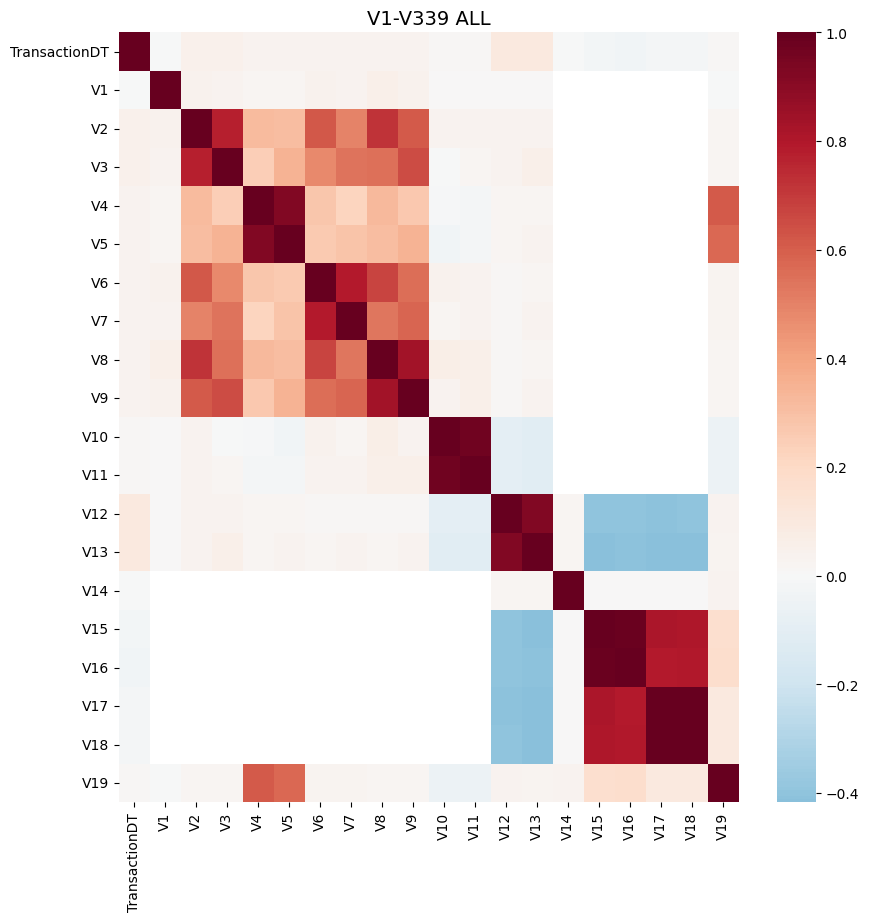

In [ ]:
#V ALL
cols = ['TransactionDT'] + ['V'+str(x) for x in range(1,20)]
train2 = train_df[cols].sample(frac=0.2)
plt.figure(figsize=(10,10))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 ALL',fontsize=14)
plt.show()

In [ ]:
#Similar procedure for other V columns resulted, taken refernce form a kaggle notebook :
#TODO : find another way to find these V elements

v =  [1, 3, 4, 6, 8, 11]
v += [13, 14, 17, 20, 23, 26, 27, 30]
v += [36, 37, 40, 41, 44, 47, 48]
v += [54, 56, 59, 62, 65, 67, 68, 70]
v += [76, 78, 80, 82, 86, 88, 89, 91]
v += [96, 98, 99, 104]
v += [107, 108, 111, 115, 117, 120, 121, 123]
v += [124, 127, 129, 130, 136]
v += [138, 139, 142, 147, 156, 162]
v += [165, 160, 166]
v += [178, 176, 173, 182]
v += [187, 203, 205, 207, 215]
v += [169, 171, 175, 180, 185, 188, 198, 210, 209]
v += [218, 223, 224, 226, 228, 229, 235]
v += [240, 258, 257, 253, 252, 260, 261]
v += [264, 266, 267, 274, 277]
v += [220, 221, 234, 238, 250, 271]
v += [294, 284, 285, 286, 291, 297]
v += [303, 305, 307, 309, 310, 320]
v += [281, 283, 289, 296, 301, 314]
v += [332, 325, 335, 338]

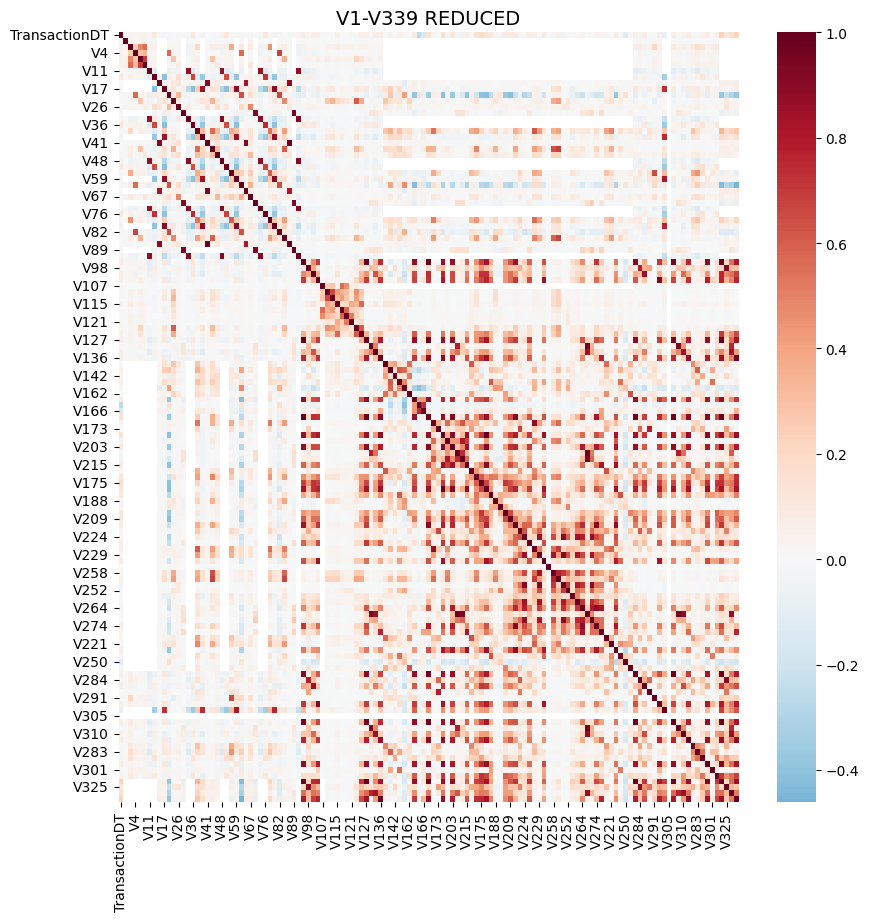

In [ ]:
# V Reduced
cols = ['TransactionDT'] + ['V'+str(x) for x in v]
train2 = train_df[cols].sample(frac=0.2)
plt.figure(figsize=(10,10))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 REDUCED',fontsize=14)
plt.show()

In [ ]:
len(v)

128

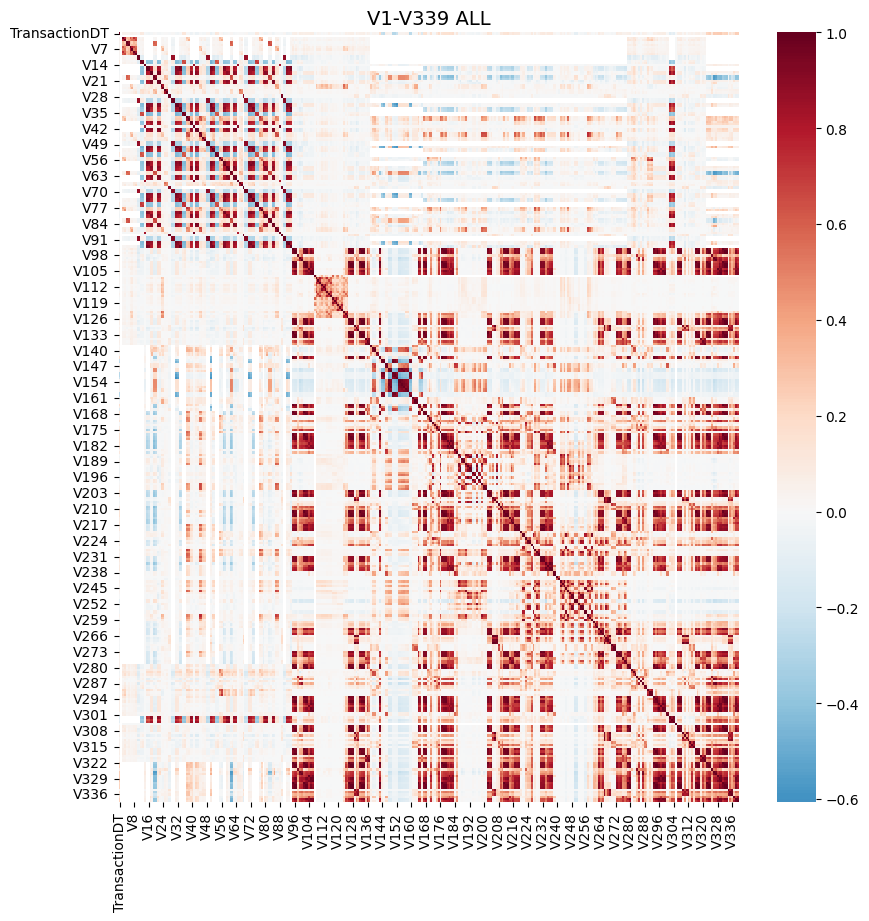

In [ ]:
# lets tally with the heatmap of previous V's and see how well we did it

#V ALL
cols = ['TransactionDT'] + ['V'+str(x) for x in range(1,340)]
train2 = train_df[cols].sample(frac=0.2)
plt.figure(figsize=(10,10))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 ALL',fontsize=14)
plt.show()

In [ ]:
total_v =[i for i in range(1,340)]
v_col_to_remove = [i for i in total_v if i not in v]
v_reduced = [ 'V'+str(i) for i in v_col_to_remove]

#Train Data
train_df.drop(v_reduced, axis=1, inplace=True)
#Test Data
test_df.drop(v_reduced, axis=1, inplace=True)

In [ ]:
train_df.head()

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
print(train_df.shape)
print(test_df.shape)

(590540, 224)
(506691, 223)


In [ ]:
# Changing T/F to 1/0 in  id_35,id_36,id_37,id_38

id_column=['id_35','id_36','id_37','id_38']

for col in id_column:
    #Train Data
    train_df[col].replace(['F','T'],[0,1],inplace=True)

    # Test Data
    test_df[col].replace(['F','T'],[0,1],inplace=True)

In [ ]:
train_df.head()

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,1.0,0.0,1.0,1.0,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,1.0,0.0,0.0,1.0,mobile,iOS Device
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,chrome 62.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,desktop,Windows
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,chrome 62.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,desktop,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1280x800,match_status:2,1.0,0.0,1.0,1.0,desktop,MacOS


In [ ]:
#Additional Features
# Bank type
train_df['bank_type'] = train_df['card3'].astype(str)+'_'+train_df['card5'].astype(str)
test_df['bank_type'] = test_df['card3'].astype(str)+'_'+test_df['card5'].astype(str)


# Full address
train_df['full_addr'] = train_df['addr1'].astype(str)+'_'+train_df['addr2'].astype(str)
test_df['full_addr'] = test_df['addr1'].astype(str)+'_'+test_df['addr2'].astype(str)


In [ ]:
train_df.head()

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,bank_type,full_addr
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,2220x1080,match_status:2,1.0,0.0,1.0,1.0,mobile,SAMSUNG SM-G892A Build/NRD90M,150.0_142.0,315.0_87.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,1334x750,match_status:1,1.0,0.0,0.0,1.0,mobile,iOS Device,150.0_102.0,325.0_87.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,0.0,0.0,1.0,1.0,desktop,Windows,150.0_166.0,330.0_87.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,0.0,0.0,1.0,1.0,desktop,NaN,150.0_117.0,476.0_87.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,1280x800,match_status:2,1.0,0.0,1.0,1.0,desktop,MacOS,150.0_102.0,420.0_87.0


In [ ]:
# New feature - log of transaction amount.
train_df['TransactionAmt_Log'] = np.log(train_df['TransactionAmt'])
test_df['TransactionAmt_Log'] = np.log(test_df['TransactionAmt'])

In [ ]:
# New feature - day of week in which a transaction happened.
train_df['Transaction_day_of_week'] = np.floor((train_df['TransactionDT'] / (3600 * 24) - 1) % 7)
test_df['Transaction_day_of_week'] = np.floor((test_df['TransactionDT'] / (3600 * 24) - 1) % 7)

In [ ]:
# New feature - hour of the day in which a transaction happened.
train_df['Transaction_hour'] = np.floor(train_df['TransactionDT'] / 3600) % 24
test_df['Transaction_hour'] = np.floor(test_df['TransactionDT'] / 3600) % 24

In [ ]:
# New feature - decimal part of the transaction amount.
train_df['TransactionAmt_decimal'] = ((train_df['TransactionAmt'] - train_df['TransactionAmt'].astype(int)) * 1000).astype(int)
test_df['TransactionAmt_decimal'] = ((test_df['TransactionAmt'] - test_df['TransactionAmt'].astype(int)) * 1000).astype(int)

In [ ]:
#Looks like the data has a time split… so make sure you are not using time as a feature.
#Dropping id31 and id13 as per this kernel: https://www.kaggle.com/tunguz/adversarial-ieee

#Train Data
# train_df.drop('id_31', axis=1, inplace=True)
train_df.drop('id_13',axis =1 , inplace=True)
#Test Data
# test_df.drop('id_31', axis=1, inplace=True)
test_df.drop('id_13',axis=1,inplace=True)

In [ ]:
train_df.head()

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_37,id_38,DeviceType,DeviceInfo,bank_type,full_addr,TransactionAmt_Log,Transaction_day_of_week,Transaction_hour,TransactionAmt_decimal
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,1.0,1.0,mobile,SAMSUNG SM-G892A Build/NRD90M,150.0_142.0,315.0_87.0,4.226834,0.0,0.0,500
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,1.0,mobile,iOS Device,150.0_102.0,325.0_87.0,3.367296,0.0,0.0,0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,1.0,1.0,desktop,Windows,150.0_166.0,330.0_87.0,4.077537,0.0,0.0,0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,1.0,1.0,desktop,NaN,150.0_117.0,476.0_87.0,3.912023,0.0,0.0,0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,1.0,1.0,desktop,MacOS,150.0_102.0,420.0_87.0,3.912023,0.0,0.0,0


In [ ]:

train_df["lastest_browser"] = np.zeros(train_df.shape[0])
test_df["lastest_browser"] = np.zeros(test_df.shape[0])

#TODO ; improve this code

def setBrowser(df):
    df.loc[df["id_31"]=="samsung browser 7.0",'lastest_browser']=1
    df.loc[df["id_31"]=="opera 53.0",'lastest_browser']=1
    df.loc[df["id_31"]=="mobile safari 10.0",'lastest_browser']=1
    df.loc[df["id_31"]=="google search application 49.0",'lastest_browser']=1
    df.loc[df["id_31"]=="firefox 60.0",'lastest_browser']=1
    df.loc[df["id_31"]=="edge 17.0",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 69.0",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 67.0 for android",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 63.0 for android",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 63.0 for ios",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 64.0",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 64.0 for android",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 64.0 for ios",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 65.0",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 65.0 for android",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 65.0 for ios",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 66.0",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 66.0 for android",'lastest_browser']=1
    df.loc[df["id_31"]=="chrome 66.0 for ios",'lastest_browser']=1
    return df

train_df=setBrowser(train_df)
test_df=setBrowser(test_df)


In [ ]:
train_df.tail()

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_38,DeviceType,DeviceInfo,bank_type,full_addr,TransactionAmt_Log,Transaction_day_of_week,Transaction_hour,TransactionAmt_decimal,lastest_browser
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,150.0_226.0,272.0_87.0,3.891820,6.0,23.0,0,0.0
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,150.0_224.0,204.0_87.0,3.676301,6.0,23.0,500,0.0
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,150.0_224.0,231.0_87.0,3.432373,6.0,23.0,949,0.0
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,150.0_224.0,387.0_87.0,4.762174,6.0,23.0,0,0.0
590539,3577539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,150.0_102.0,299.0_87.0,5.634611,6.0,23.0,949,0.0


Can't concatenate total data . so performing test and train seperately

In [ ]:
print(train_df.shape)
print(test_df.shape)

(590540, 230)
(506691, 229)


In [ ]:
def drop_missing_values(df):

    missing_values_count = (df.isnull().sum() / df.shape[0]) * 100

    columns_to_remove = []
    for i in range(len(missing_values_count)):
      if missing_values_count[i] > 70 :
        columns_to_remove.append(df.columns.values[int(i)])


    print(len(columns_to_remove))
    return columns_to_remove

In [ ]:
#Train_data
columns_to_remove = drop_missing_values(train_df)
train_df.drop(columns_to_remove, axis=1, inplace=True)
print("Train data shape {}".format(train_df.shape))
#Test_data
columns_to_remove = drop_missing_values(test_df)
test_df.drop(columns_to_remove, axis=1, inplace=True)
print("Test data shape {}".format(test_df.shape))

105
Train data shape (590540, 125)
105
Test data shape (506691, 124)


In [ ]:
#  frequency encoding

def frequency_encode(df):
    columns_to_encode = []
    for f in df.columns:
      if df[f].dtype == 'object':
        columns_to_encode.append(f)

    print(columns_to_encode)
    for col in columns_to_encode:
      fq_encode = df[col].value_counts(dropna=False) / len(df)
      df[col] = df[col].map(fq_encode)


In [ ]:
# label encoding

def label_encode(df):
    columns_to_encode = []
    for f in df.columns:
      if df[f].dtype == 'object':
        columns_to_encode.append(f)

    print(columns_to_encode)

    for col in columns_to_encode:
       lbl = preprocessing.LabelEncoder()
       lbl.fit(list(df[col].values) )
       df[col] = lbl.transform(list(df[col].values))


In [ ]:
#Train Data
frequency_encode(train_df)
#Test Data
frequency_encode(test_df)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'bank_type', 'full_addr']
['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'bank_type', 'full_addr']


In [ ]:
print(train_df.shape)
train_df.head()

(590540, 125)


,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V310,V314,V320,bank_type,full_addr,TransactionAmt_Log,Transaction_day_of_week,Transaction_hour,TransactionAmt_decimal,lastest_browser
0,2987000,0,86400,68.5,0.744522,13926,NaN,150.0,0.011263,142.0,...,0.0,0.0,0.0,0.000469,0.039078,4.226834,0.0,0.0,500,0.0
1,2987001,0,86401,29.0,0.744522,2755,404.0,150.0,0.320414,102.0,...,0.0,0.0,0.0,0.043907,0.072388,3.367296,0.0,0.0,0,0.0
2,2987002,0,86469,59.0,0.744522,4663,490.0,150.0,0.651551,166.0,...,0.0,0.0,0.0,0.095658,0.044508,4.077537,0.0,0.0,0,0.0
3,2987003,0,86499,50.0,0.744522,18132,567.0,150.0,0.320414,117.0,...,354.0,0.0,0.0,0.043924,0.016046,3.912023,0.0,0.0,0,0.0
4,2987004,0,86506,50.0,0.055922,4497,514.0,150.0,0.320414,102.0,...,0.0,0.0,0.0,0.043907,0.006064,3.912023,0.0,0.0,0,0.0


In [ ]:
print(test_df.shape)
test_df.head()

(506691, 124)


,TransactionID_x,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V310,V314,V320,bank_type,full_addr,TransactionAmt_Log,Transaction_day_of_week,Transaction_hour,TransactionAmt_decimal,lastest_browser
0,3663549,18403224,31.95,0.71244,10409,111.0,150.0,0.660920,226.0,0.759873,...,47.950001,0.000000,0.0,0.485173,0.003570,3.464172,2.0,0.0,949,1.0
1,3663550,18403263,49.00,0.71244,4272,111.0,150.0,0.660920,226.0,0.759873,...,280.000000,0.000000,0.0,0.485173,0.076368,3.891820,2.0,0.0,0,1.0
2,3663551,18403310,171.00,0.71244,4476,574.0,150.0,0.660920,226.0,0.759873,...,1058.000000,0.000000,263.0,0.485173,0.014261,5.141664,2.0,0.0,0,0.0
3,3663552,18403310,284.95,0.71244,10989,360.0,150.0,0.660920,166.0,0.759873,...,0.000000,282.540009,0.0,0.088421,0.010460,5.652314,2.0,0.0,949,1.0
4,3663553,18403317,67.95,0.71244,18018,452.0,150.0,0.312161,117.0,0.759873,...,183.850006,183.850006,0.0,0.041682,0.064556,4.218772,2.0,0.0,950,1.0


In [ ]:
#Smooth data
# Removal of uncommon data with nans


In [ ]:
# columns_name = full_df.columns
# result = [i for i in columns_name if i.startswith('V')]

# full_df.drop(result, axis=1, inplace=True)

In [ ]:
#Fill Nans
#Train_data
train_df = train_df.fillna(-999)
#Test_data
test_df = test_df.fillna(-999)

In [ ]:
print(train_df.shape)
train_df.head()

(590540, 125)


,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V310,V314,V320,bank_type,full_addr,TransactionAmt_Log,Transaction_day_of_week,Transaction_hour,TransactionAmt_decimal,lastest_browser
0,2987000,0,86400,68.5,0.744522,13926,-999.0,150.0,0.011263,142.0,...,0.0,0.0,0.0,0.000469,0.039078,4.226834,0.0,0.0,500,0.0
1,2987001,0,86401,29.0,0.744522,2755,404.0,150.0,0.320414,102.0,...,0.0,0.0,0.0,0.043907,0.072388,3.367296,0.0,0.0,0,0.0
2,2987002,0,86469,59.0,0.744522,4663,490.0,150.0,0.651551,166.0,...,0.0,0.0,0.0,0.095658,0.044508,4.077537,0.0,0.0,0,0.0
3,2987003,0,86499,50.0,0.744522,18132,567.0,150.0,0.320414,117.0,...,354.0,0.0,0.0,0.043924,0.016046,3.912023,0.0,0.0,0,0.0
4,2987004,0,86506,50.0,0.055922,4497,514.0,150.0,0.320414,102.0,...,0.0,0.0,0.0,0.043907,0.006064,3.912023,0.0,0.0,0,0.0


In [ ]:
print(test_df.shape)
test_df.head()

(506691, 124)


,TransactionID_x,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V310,V314,V320,bank_type,full_addr,TransactionAmt_Log,Transaction_day_of_week,Transaction_hour,TransactionAmt_decimal,lastest_browser
0,3663549,18403224,31.95,0.71244,10409,111.0,150.0,0.660920,226.0,0.759873,...,47.950001,0.000000,0.0,0.485173,0.003570,3.464172,2.0,0.0,949,1.0
1,3663550,18403263,49.00,0.71244,4272,111.0,150.0,0.660920,226.0,0.759873,...,280.000000,0.000000,0.0,0.485173,0.076368,3.891820,2.0,0.0,0,1.0
2,3663551,18403310,171.00,0.71244,4476,574.0,150.0,0.660920,226.0,0.759873,...,1058.000000,0.000000,263.0,0.485173,0.014261,5.141664,2.0,0.0,0,0.0
3,3663552,18403310,284.95,0.71244,10989,360.0,150.0,0.660920,166.0,0.759873,...,0.000000,282.540009,0.0,0.088421,0.010460,5.652314,2.0,0.0,949,1.0
4,3663553,18403317,67.95,0.71244,18018,452.0,150.0,0.312161,117.0,0.759873,...,183.850006,183.850006,0.0,0.041682,0.064556,4.218772,2.0,0.0,950,1.0


In [ ]:
train_df.columns

Index(['TransactionID_x', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V310', 'V314', 'V320', 'bank_type', 'full_addr', 'TransactionAmt_Log',
       'Transaction_day_of_week', 'Transaction_hour', 'TransactionAmt_decimal',
       'lastest_browser'],
      dtype='object', length=125)

Let's Reduce Memory and Pickle it

In [ ]:
train_df.shape

(590540, 125)

In [ ]:
test_df.shape

(506691, 124)

In [ ]:
train_df.to_pickle('train_df.pkl')
test_df.to_pickle('test_df.pkl')

In [ ]:
# train_df = full_df[:TRAIN_SHAPE[0]]
# test_df = full_df[TRAIN_SHAPE[0]:]

In [ ]:
# print(train_df.shape)
# print(test_df.shape)
# print(train_df.shape[0] + test_df.shape[0])

In [ ]:
# print(target.shape)

In [ ]:
# train_df['isFraud'] = target

In [ ]:
# no_fraud, yes_fraud = train_df['isFraud'].value_counts()
# total_transactions = len(train_df)
# print(" No Fraud transactions is {}%".format(no_fraud * 100/total_transactions))
# print("Fraud transactions is {}%".format(yes_fraud * 100 /total_transactions))

In [ ]:
# train_df.head()

In [ ]:
# test_df.head()

In [ ]:
# reduce_mem_usage(test_df)

In [ ]:
# reduce_mem_usage(train_df)

In [ ]:
# train_df.to_pickle('train_df.pkl')
# test_df.to_pickle('test_df.pkl')

In [ ]:
# train_df.columns

In [ ]:
# 2. Drop Irrelevant V column features

# import gc
# nans_df = full_df.isna()
# nans_groups={}
# i_cols = ['V'+str(i) for i in range(1,340)]
# for col in full_df.columns:
#     cur_group = nans_df[col].sum()
#     try:
#         nans_groups[cur_group].append(col)
#     except:
#         nans_groups[cur_group]=[col]
# del nans_df; x=gc.collect()


# for k,v in nans_groups.items():
#     print('####### NAN count =',k)
#     print(v)


In [ ]:
# Vs = nans_groups[144233]
# Vtitle = 'V1 - V11, D11'

In [ ]:
# train_df['V2'].isnull().sum()

In [ ]:
# Vs = ['D11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']

In [ ]:
# def make_corr(Vs,Vtitle=''):
#     cols = ['TransactionDT'] + Vs
#     plt.figure(figsize=(15,15))
#     sns.heatmap(train_df[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
#     if Vtitle!='': plt.title(Vtitle,fontsize=14)
#     else: plt.title(Vs[0]+' - '+Vs[-1],fontsize=14)
#     plt.show()
# make_corr(Vs,Vtitle='D11-V11')